In [436]:
import data.prem_data_collection
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold, cross_val_score

In [437]:
importlib.reload(data.prem_data_collection)
df = data.prem_data_collection.df

                        name Squad avg_age Foreigners  matchday  cumsum_pts  \
0                    Arsenal    40    24.6         23         1           3   
1                    Arsenal    40    24.6         23         2           6   
2                    Arsenal    40    24.6         23         3           7   
3                    Arsenal    40    24.6         23         4          10   
4                    Arsenal    40    24.6         23         5          13   
..                       ...   ...     ...        ...       ...         ...   
755  Wolverhampton Wanderers    47    23.9         32        34          43   
756  Wolverhampton Wanderers    47    23.9         32        35          46   
757  Wolverhampton Wanderers    47    23.9         32        36          46   
758  Wolverhampton Wanderers    47    23.9         32        37          46   
759  Wolverhampton Wanderers    47    23.9         32        38          46   

     cumsum_xpts  non-penalty xGD  pressing intensi

In [438]:
train_df = df[df["matchday"] <= 4]
test_df = df[df["matchday"] == 5]

X_train = train_df.drop(columns=["name", "relegated"])
y_train = train_df["relegated"]

X_test = test_df.drop(columns=["name", "relegated"])
y_test = test_df["relegated"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# from RandomForest module 
test_df["relegation_proba"] = model.predict_proba(X_test)[:, 1]

print(test_df[["name", "matchday", "relegation_proba"]].sort_values("relegation_proba", ascending=False))

                        name  matchday  relegation_proba
612         Sheffield United         5              0.94
422                    Luton         5              0.43
194                  Burnley         5              0.39
308                  Everton         5              0.04
346                   Fulham         5              0.04
726  Wolverhampton Wanderers         5              0.03
80               Bournemouth         5              0.01
498        Manchester United         5              0.00
688                 West Ham         5              0.00
650                Tottenham         5              0.00
574        Nottingham Forest         5              0.00
536         Newcastle United         5              0.00
4                    Arsenal         5              0.00
460          Manchester City         5              0.00
42               Aston Villa         5              0.00
270           Crystal Palace         5              0.00
232                  Chelsea   

C:\Users\MohudAlBazzaz\AppData\Local\Temp\ipykernel_8052\2923730710.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["relegation_proba"] = model.predict_proba(X_test)[:, 1]


C:\Users\MohudAlBazzaz\AppData\Local\Temp\ipykernel_8052\2061940718.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["relegation_proba"] = model.predict_proba(X_test)[:, 1]
C:\Users\MohudAlBazzaz\AppData\Local\Temp\ipykernel_8052\2061940718.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["matchday"] = md
C:\Users\MohudAlBazzaz\AppData\Local\Temp\ipykernel_8052\2061940718.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

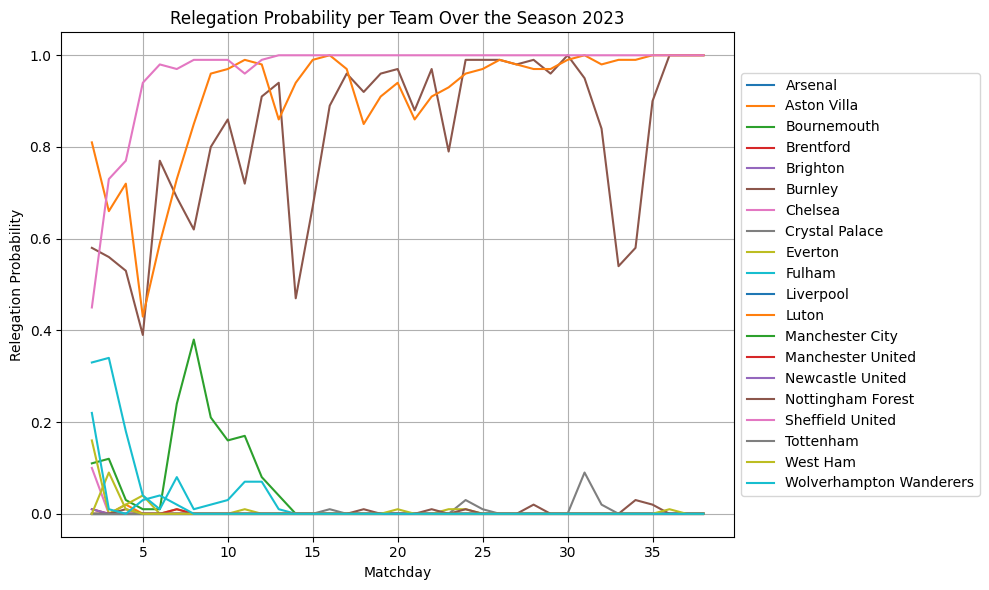

In [439]:
prob_list = []

for md in sorted(df["matchday"].unique()):

    train_df = df[df["matchday"] < md]
    test_df = df[df["matchday"] == md]

    # when md = 1 there exists not training data
    if train_df.empty or test_df.empty:
        continue

    X_train = train_df.drop(columns=["name", "relegated"])
    y_train = train_df["relegated"]

    X_test = test_df.drop(columns=["name", "relegated"])

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    test_df["relegation_proba"] = model.predict_proba(X_test)[:, 1]
    test_df["matchday"] = md

    prob_list.append(test_df[["name", "matchday", "relegation_proba"]])

# combines all probabilities into one df so easier to visualise 
relegation_probs = pd.concat(prob_list)

plt.figure(figsize=(10, 6))

for team in relegation_probs["name"].unique():
    team_data = relegation_probs[relegation_probs["name"] == team]
    plt.plot(team_data["matchday"], team_data["relegation_proba"], label=team)

plt.xlabel("Matchday")
plt.ylabel("Relegation Probability")
season = data.prem_data_collection.prem_season
plt.title(f"Relegation Probability per Team Over the Season {(season)}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [440]:
# from RandomForest
importances = model.feature_importances_

# match them to column names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

                         Feature  Importance
15              avg_player_value    0.314562
6                non-penalty xGD    0.195666
11               attack_strength    0.153865
14               non-penality GD    0.129419
10               points_per_game    0.078473
9         goal_difference_so_far    0.039824
8   defending pressing intensity    0.016480
7             pressing intensity    0.015555
12                 defense_solid    0.011953
2                     Foreigners    0.010298
13              tactical_balance    0.009012
1                        avg_age    0.008110
5                    cumsum_xpts    0.007892
0                          Squad    0.004590
3                       matchday    0.003029
4                     cumsum_pts    0.001272
